<a href="https://colab.research.google.com/github/shhd-0/ML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# إنشاء مجلد للكاجل وتثبيت المكتبة
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()  # ارفع ملف kaggle.json هنا

# نقل الملف إلى مجلد kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving archive.zip to archive.zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
# تثبيت kaggle إذا لم تكن مثبتة
!pip install -q kaggle

# تحميل مجموعة البيانات
!kaggle datasets download -d charlottebennett1234/lifestyle-factors-and-their-impact-on-students

# فك الضغط عن الملفات
!unzip -q /content/archive.zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# تحميل البيانات
df = pd.read_csv("student_lifestyle_dataset..csv")

# عرض معلومات عن البيانات
print(df.head())
print(df.info())


   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

  Stress_Level  Gender  Grades  
0     Moderate    Male    7.48  
1          Low  Female    6.88  

In [ ]:
# إزالة العمود غير المهم
df = df.drop("Student_ID", axis=1)

# تحويل Grades إلى فئة تصنيف
def convert_grade_to_class(grade):
    if grade >= 8:
        return 'High'
    elif grade >= 6:
        return 'Medium'
    else:
        return 'Low'

df['Grade_Level'] = df['Grades'].apply(convert_grade_to_class)
df.drop('Grades', axis=1, inplace=True)  # حذف العمود الأصلي

# تحويل القيم النصية إلى أرقام
for column in ['Stress_Level', 'Gender', 'Grade_Level']:
    df[column] = df[column].astype('category').cat.codes

# تحديد الميزات والهدف
X = df.drop("Grade_Level", axis=1)
y = df["Grade_Level"]



In [ ]:
# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# تطبيع البيانات
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تدريب نموذج KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# التنبؤ
y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc * 100:.2f}%")


Accuracy: 74.50%


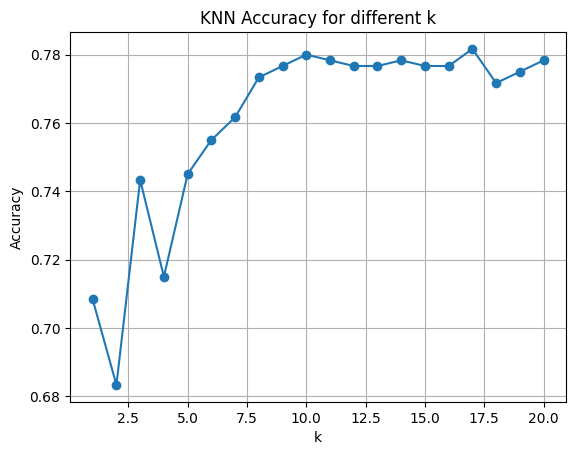

In [ ]:
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)

plt.plot(k_range, accuracies, marker='o')
plt.title('KNN Accuracy for different k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[162   0  71]
 [  0   0   5]
 [ 77   0 285]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       233
           1       0.00      0.00      0.00         5
           2       0.79      0.79      0.79       362

    accuracy                           0.74       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.74      0.74      0.74       600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import joblib
joblib.dump(knn, "knn_model.pkl")


['knn_model.pkl']

In [ ]:
# مثال: طالب جديد بقيم معينة
new_student = [[7.0, 2.0, 8.0, 3.0, 2.5, 1, 0]]  # تأكد من ترتيب الأعمدة ومطابقة الترميز

# نفس التطبيع الذي عملناه
new_student_scaled = scaler.transform(new_student)

# التنبؤ
prediction = knn.predict(new_student_scaled)
print(f"Predicted grade level: {prediction[0]}")


Predicted grade level: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
